# Chapter 3 - Visualization with Statistical Graphs

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Basic examples with Python Matplotlib package

### Simple line chart

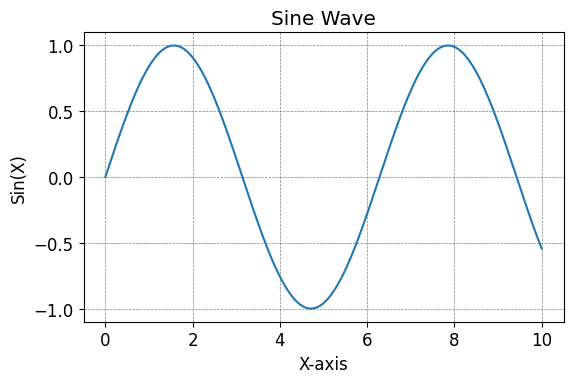

In [5]:
fig = plt.figure(figsize=(6, 4))        # Set the figure size
plt.rcParams.update({'font.size': 12})  # Update the font size globally for all labels, titles, and ticks

x = np.linspace(0, 10, 1000)  # Generate 1000 evenly spaced points between 0 and 10
plt.plot(x, np.sin(x))        # Plot the sine function for the generated x values

plt.title("Sine Wave")        # Add a title to the plot
plt.xlabel("X-axis")          # Label the x-axis
plt.ylabel("Sin(X)")          # Label the y-axis
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add a grid

plt.tight_layout()            # Adjust layout
plt.show()                    # Display the plot

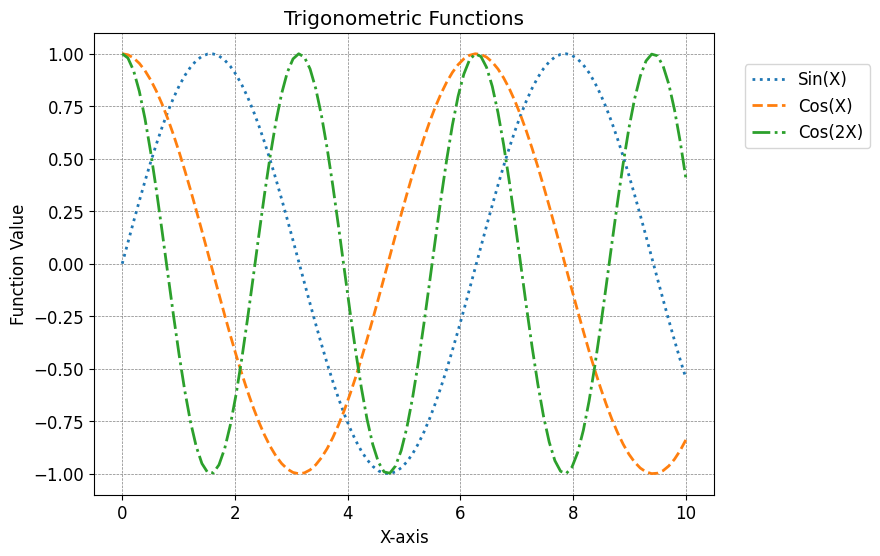

In [6]:
fig = plt.figure(figsize=(8, 6))  # Set the figure size to 10x8 inches for better readability and aesthetics

x = np.linspace(0, 10, 100)       # Generate 100 evenly spaced points between 0 and 10

# Plot the sine function with a dotted line, line width 2, and label
plt.plot(x, np.sin(x), linestyle=":", linewidth=2, label="Sin(X)")

# Plot the cosine function with a dashed line, line width 2, and label
plt.plot(x, np.cos(x), linestyle="--", linewidth=2, label="Cos(X)")

# Plot the cosine of 2x with a dash-dot line, line width 2, and label
plt.plot(x, np.cos(2 * x), linestyle="-.", linewidth=2, label="Cos(2X)")

plt.legend(loc=[1.05, 0.75])  # Add a legend at the specified location

plt.title("Trigonometric Functions")  # Add a title to the plot
plt.xlabel("X-axis")                  # Label the x-axis
plt.ylabel("Function Value")          # Label the y-axis
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add a grid

#plt.tight_layout()  # Adjust layout 
plt.show()           # Display the plot

## Histogram Plot

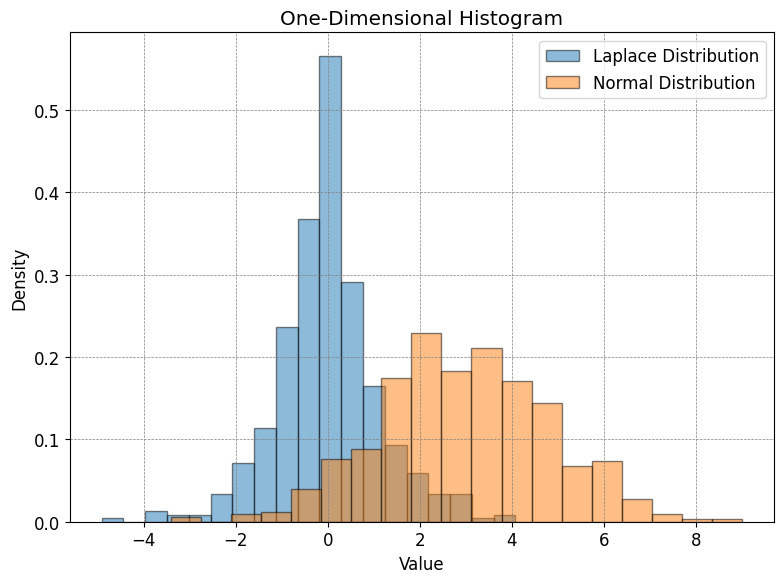

In [8]:
fig = plt.figure(figsize=(8, 6))             # Set the figure size

# Generate 500 samples from a Laplace distribution with mean 0 and scale 0.8
x1 = np.random.laplace(0, 0.8, 500)

# Generate 500 samples from a normal distribution with mean 3 and standard deviation 2
x2 = np.random.normal(3, 2, 500)

# Plot a histogram of the Laplace distribution samples
plt.hist(
    x1, 
    alpha=0.5,                               # Set transparency to 50% for overlapping histograms
    density=True,                            # Normalize the histogram to show density instead of count
    bins=np.linspace(min(x1), max(x1), 20),  # Use 20 bins ranging from min to max of x1
    edgecolor='black',                       # Set the color of the edges
    label="Laplace Distribution"             # Add a legend label for the Laplace distribution
)

# Plot a histogram of the normal distribution samples
plt.hist(
    x2, 
    alpha=0.5,                               # Set transparency to 50% for overlapping histograms
    density=True,                            # Normalize the histogram to show density instead of count
    bins=np.linspace(min(x2), max(x2), 20),  # Use 20 bins ranging from min to max of x2
    edgecolor='black',                       # Set the color of the edges
    label="Normal Distribution"              # Add a legend label for the normal distribution
)

plt.title("One-Dimensional Histogram")       # Add a title to describe the plot
plt.xlabel("Value")                          # Label the x-axis
plt.ylabel("Density")                        # Label the y-axis
plt.legend()                                 # Add a legend to differentiate between the two distributions
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add a grid for better readability
plt.tight_layout()                           # Adjust the layout
plt.show()                                   # Display the histogram

## Boxplot

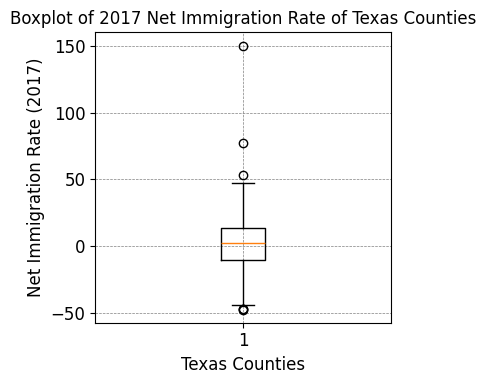

In [10]:
fig = plt.figure(figsize=(4, 4))                                     # Set the figure size

# Read the Excel file while skipping the first two rows (metadata/header rows)
df = pd.read_excel("PopulationEstimates.xls", skiprows=2)

# Filter the DataFrame to include only rows where the state is 'TX'
dfTX = df[df["State"] == "TX"].iloc[1:]                              # Exclude the first row

# Create a boxplot for the 2017 Net Immigration Rate for Texas counties
plt.boxplot(dfTX['R_NET_MIG_2017'].dropna())                        

plt.title("Boxplot of 2017 Net Immigration Rate of Texas Counties", fontsize=12)  # Add a title
plt.xlabel("Texas Counties")                                         # Label the x-axis
plt.ylabel("Net Immigration Rate (2017)")                            # Label the y-axis
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add a grid

plt.tight_layout()                                                   # Adjust layout
plt.show()                                                           # Display the boxplot

## Scatter Plot

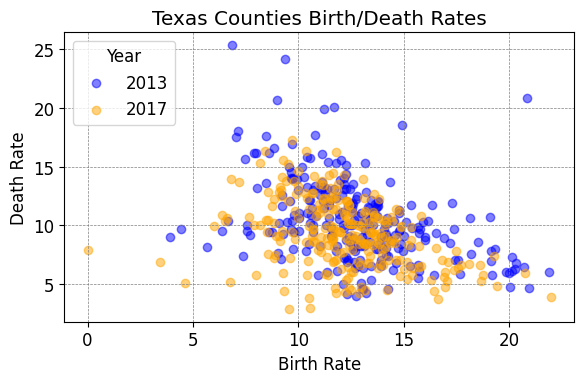

In [12]:
plt.figure(figsize=(6, 4))                     # Set the figure size

# Scatter plot for 2013 data, with alpha for transparency to handle overlapping points
plt.scatter(
    dfTX.R_birth_2013, dfTX.R_death_2013, 
    alpha=0.5, label="2013", color="blue"      # Add color for distinction
)

# Scatter plot for 2017 data, with alpha for transparency to handle overlapping points
plt.scatter(
    dfTX.R_birth_2017, dfTX.R_death_2017, 
    alpha=0.5, label="2017", color="orange"    # Add color for distinction
)

plt.legend(title="Year")                       # Add a legend with a title for clarity

plt.xlabel("Birth Rate")                       # Label the x-axis
plt.ylabel("Death Rate")                       # Label the y-axis
plt.title("Texas Counties Birth/Death Rates")  # Add a descriptive title

plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add gridlines

plt.tight_layout()  # Adjust layout
plt.show()          # Display the scatter plot

## Bar Plot

In [14]:
# Filter column names that start with "R_birth" to get all birth rate columns
birthRates = list(filter(lambda x: x.startswith("R_birth"), dfTX.columns))

# Filter column names that start with "R_death" to get all death rate columns
deathRates = list(filter(lambda x: x.startswith("R_death"), dfTX.columns))

# Extract the year information from the birth rate column names by taking the last 4 characters
years = np.array(list(map(lambda x: int(x[-4:]), birthRates)))

# Print the extracted information (optional for debugging)
print("Birth Rates Columns:", birthRates)
print("Death Rates Columns:", deathRates)
print("Years:", years)

Birth Rates Columns: ['R_birth_2011', 'R_birth_2012', 'R_birth_2013', 'R_birth_2014', 'R_birth_2015', 'R_birth_2016', 'R_birth_2017', 'R_birth_2018']
Death Rates Columns: ['R_death_2011', 'R_death_2012', 'R_death_2013', 'R_death_2014', 'R_death_2015', 'R_death_2016', 'R_death_2017', 'R_death_2018']
Years: [2011 2012 2013 2014 2015 2016 2017 2018]


In [15]:
# Return the first row of the dfTX DataFrame
dfTX.iloc[0]

FIPS                                         48001
State                                           TX
Area_Name                          Anderson County
Rural-urban_Continuum Code_2003                5.0
Rural-urban_Continuum Code_2013                7.0
                                        ...       
R_NET_MIG_2014                           -0.051802
R_NET_MIG_2015                            -2.83995
R_NET_MIG_2016                           -0.729192
R_NET_MIG_2017                           12.266547
R_NET_MIG_2018                            -0.80847
Name: 2568, Length: 149, dtype: object

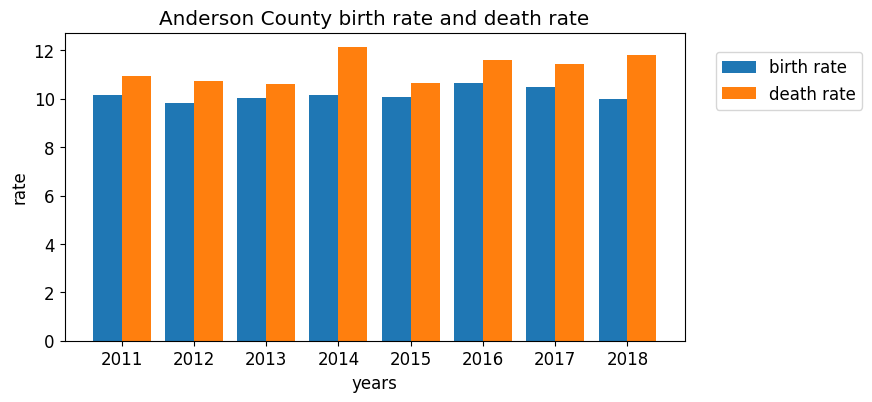

In [16]:
plt.figure(figsize=(8, 4))  # Create a figure with specified dimensions

width = 0.4                                # Set the width of the bars

# Create a bar plot for birth rates with bars positioned slightly to the left
plt.bar(
    years - width / 2,                     # Adjust the position of the bars to the left by half the bar width
    dfTX.iloc[0][birthRates],              # Birth rate values from the first row of dfTX
    width=width,                           # Width of the bars
    label="birth rate",                    # Legend label for birth rates
    alpha=1                                # Set the opacity of the bars to fully opaque
)

# Create a bar plot for death rates with bars positioned slightly to the right
plt.bar(
    years + width / 2,                     # Adjust the position of the bars to the right by half the bar width
    dfTX.iloc[0][deathRates],              # Death rate values from the first row of dfTX
    width=width,                           # Width of the bars
    label="death rate",                    # Legend label for death rates
    alpha=1                                # Set the opacity of the bars to fully opaque
)

plt.xlabel("years")  # Label for the x-axis
plt.ylabel("rate")   # Label for the y-axis
plt.legend(loc=[1.05, 0.75])  # Add a legend at the specified location
plt.title("Anderson County birth rate and death rate")  # Set the title of the plot

plt.show()  # Display the bar plot

## Line Chart for the same data

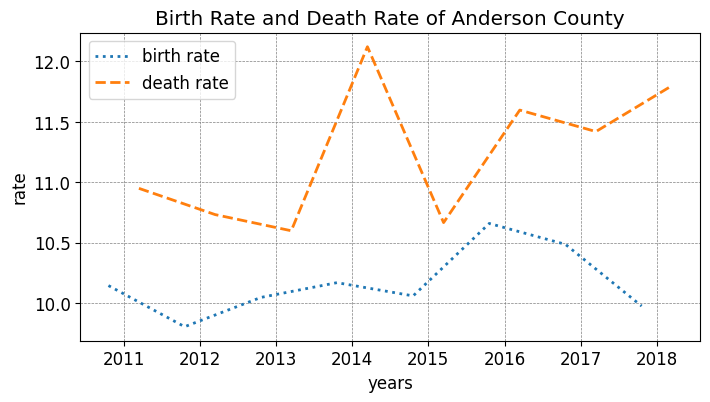

In [18]:
plt.figure(figsize=(8, 4))  # Create a figure with dimensions 8x4 inches

width = 0.4                 # Offset width for positioning the lines slightly apart

# Plot the birth rate with a dotted line
plt.plot(
    years - width / 2,                     # Shift the x-coordinates slightly to the left
    dfTX.iloc[0][birthRates],              # Birth rate values from the first row of dfTX
    label="birth rate",                    # Legend label for birth rate
    linestyle=":",                         # Use a dotted line style
    linewidth=2                            # Set the line width to 4 for better visibility
)

# Plot the death rate with a dashed line
plt.plot(
    years + width / 2,                     # Shift the x-coordinates slightly to the right
    dfTX.iloc[0][deathRates],              # Death rate values from the first row of dfTX
    label="death rate",                    # Legend label for death rate
    linestyle="--",                        # Use a dashed line style
    linewidth=2                            # Set the line width to 4 for better visibility
)

plt.xlabel("years")  # Label for the x-axis
plt.ylabel("rate")   # Label for the y-axis
plt.legend()         # Add a legend to distinguish between birth and death rates
plt.title("Birth Rate and Death Rate of Anderson County")  # Set the title of the plot
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add gridlines

plt.show()           # Display the line plot

## Advanced Visualization Customization

In [20]:
# Extract column names related to birth rates
birthRates = list(filter(lambda x: x.startswith("R_birth"), dfTX.columns))  

# Extract column names related to population changes
popChanges = list(filter(lambda x: x.startswith("N_POP_CHG"), dfTX.columns))  

# Extract years from the column names (last 4 digits) and convert to integers
years = np.array(list(map(lambda x: int(x[-4:]), birthRates)))  

# Print the extracted information (optional for debugging)
print("Birth Rates Columns:", birthRates)
print("\nPopulation Changes Columns:", popChanges)
print("\nYears:", years)

Birth Rates Columns: ['R_birth_2011', 'R_birth_2012', 'R_birth_2013', 'R_birth_2014', 'R_birth_2015', 'R_birth_2016', 'R_birth_2017', 'R_birth_2018']

Population Changes Columns: ['N_POP_CHG_2010', 'N_POP_CHG_2011', 'N_POP_CHG_2012', 'N_POP_CHG_2013', 'N_POP_CHG_2014', 'N_POP_CHG_2015', 'N_POP_CHG_2016', 'N_POP_CHG_2017', 'N_POP_CHG_2018']

Years: [2011 2012 2013 2014 2015 2016 2017 2018]


In [21]:
# All elements in the popChanges list starting from the second element
popChanges[1:]

['N_POP_CHG_2011',
 'N_POP_CHG_2012',
 'N_POP_CHG_2013',
 'N_POP_CHG_2014',
 'N_POP_CHG_2015',
 'N_POP_CHG_2016',
 'N_POP_CHG_2017',
 'N_POP_CHG_2018']

## Axis-sharing and subplots

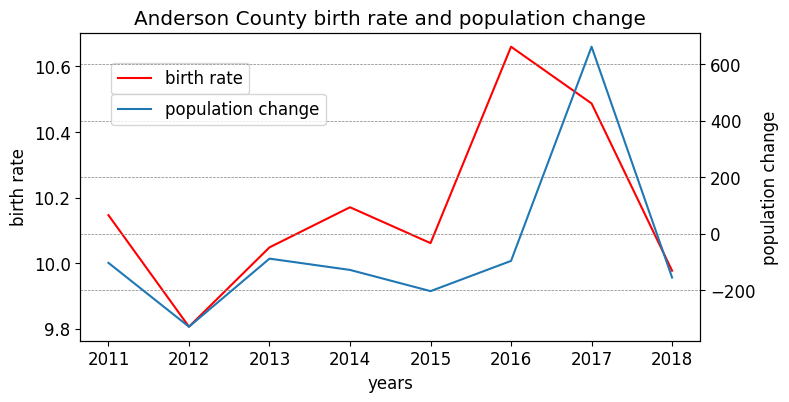

In [23]:
# Create a figure and primary axis
figure, ax1 = plt.subplots(figsize=(8, 4))  # Set the figure size

# Plot birth rates on the primary axis
ax1.plot(years, dfTX.iloc[0][birthRates], label="birth rate", c="red")  # Plot birth rate in red
ax1.set_xlabel("years")                                                 # Label the x-axis
ax1.set_ylabel("birth rate")                                            # Label the y-axis
ax1.legend(loc=[0.05, 0.8])                                             # Add legend for the primary axis

# Create a secondary axis that shares the same x-axis
ax2 = ax1.twinx()  # Twin the primary axis for the second variable
ax2.plot(years, dfTX.iloc[0][popChanges][1:], label="population change")  # Plot population change
ax2.set_ylabel("population change")                                       # Label the y-axis
ax2.legend(loc=[0.05, 0.7])                                               # Add legend for the secondary axis

# Add a title to the figure
plt.title("Anderson County birth rate and population change")             # Set the title for the graph

plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")       # Add gridlines

plt.show()  # Display the graph

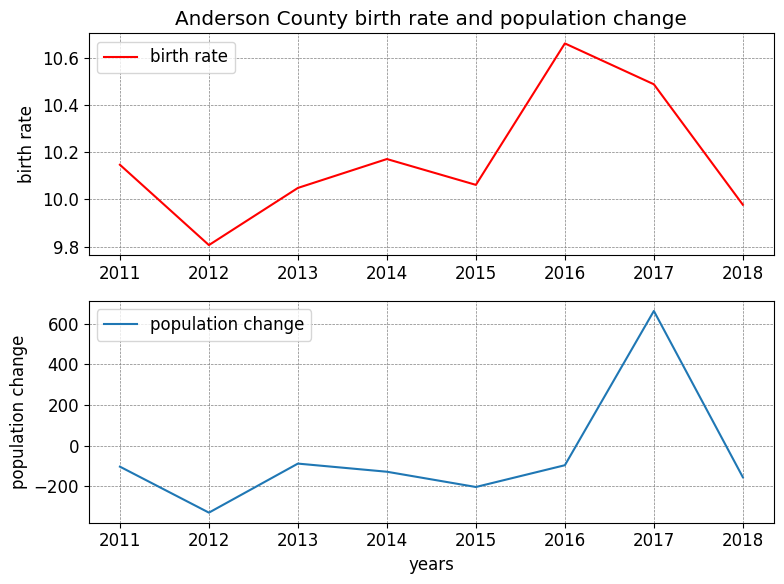

In [24]:
# Create a figure with two subplots arranged vertically
figure, axes = plt.subplots(2, 1, figsize=(8, 6))                           # Set the figure size

# Plot birth rate on the first subplot
axes[0].plot(years, dfTX.iloc[0][birthRates], label="birth rate", c="red")  # Plot birth rate in red
axes[0].set_ylabel("birth rate")                                            # Label the y-axis
axes[0].legend()                                                            # Add a legend
axes[0].set_title("Anderson County birth rate and population change")       # Set title
axes[0].grid(visible=True, linestyle="--", linewidth=0.5, color="grey")     # Add gridlines

# Plot population change on the second subplot
axes[1].plot(years, dfTX.iloc[0][popChanges][1:], label="population change")  # Plot population change
axes[1].set_xlabel("years")                                                   # Label the x-axis
axes[1].set_ylabel("population change")                                       # Label the y-axis
axes[1].legend()                                                              # Add a legend
axes[1].grid(visible=True, linestyle="--", linewidth=0.5, color="grey")       # Add gridline

plt.tight_layout()  # Adjust layout
plt.show()          # Display the graph

## Scale Change

In [26]:
from datetime import datetime

url = 'https://raw.githubusercontent.com/PacktPublishing/Essential-Statistics-for-Non-STEM-Data-Analysts/refs/heads/master/Chapter03/total_cases_03_15_2020.csv'
coronaCases = pd.read_csv(url)

# Convert the "date" column in the coronaCases DataFrame to datetime objects
coronaCases["date"] = coronaCases["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

coronaCases.head()

,date,World,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,...,Trinidad and Tobago,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Vatican,Venezuela,Vietnam
0,2020-01-21,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-22,314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-23,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,2020-01-24,846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0
4,2020-01-25,1320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0


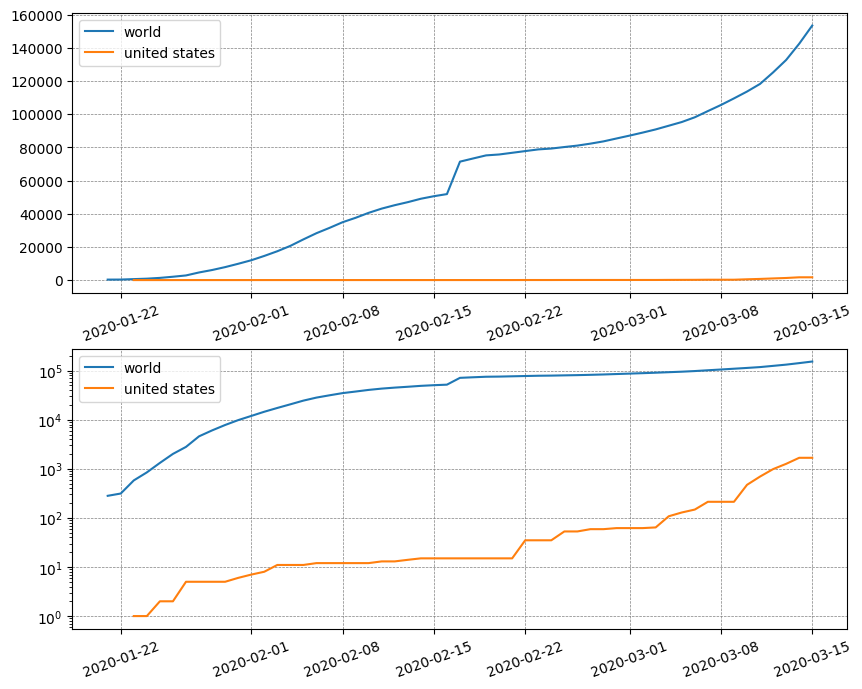

In [27]:
plt.rcParams.update({'font.size': 10})  # Update font size

# Create a figure with two subplots stacked vertically
figure, axes = plt.subplots(2, 1, figsize=(10, 8))  

# Plot the "World" and "United States" data on the first subplot
axes[0].plot(coronaCases["date"], coronaCases["World"], label="world")                  # Plot World cases
axes[0].plot(coronaCases["date"], coronaCases["United States"], label="united states")  # Plot US cases

# Plot the "World" and "United States" data on the second subplot
axes[1].plot(coronaCases["date"], coronaCases["World"], label="world")                  # Plot World cases
axes[1].plot(coronaCases["date"], coronaCases["United States"], label="united states")  # Plot US cases

# Add legends to both subplots
axes[0].legend()
axes[1].legend() 

# Add gridlines
axes[0].grid(visible=True, linestyle="--", linewidth=0.5, color="grey")     
axes[1].grid(visible=True, linestyle="--", linewidth=0.5, color="grey") 

# Rotate the x-axis labels for better readability
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=20)  # Rotate x-axis labels in the first subplot
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=20)  # Rotate x-axis labels in the second subplot

# Set the y-axis scale of the second subplot to logarithmic
axes[1].set_yscale("log")                                   # Use log scale to display the range of values better

## Customize Aesthetics
### Markers

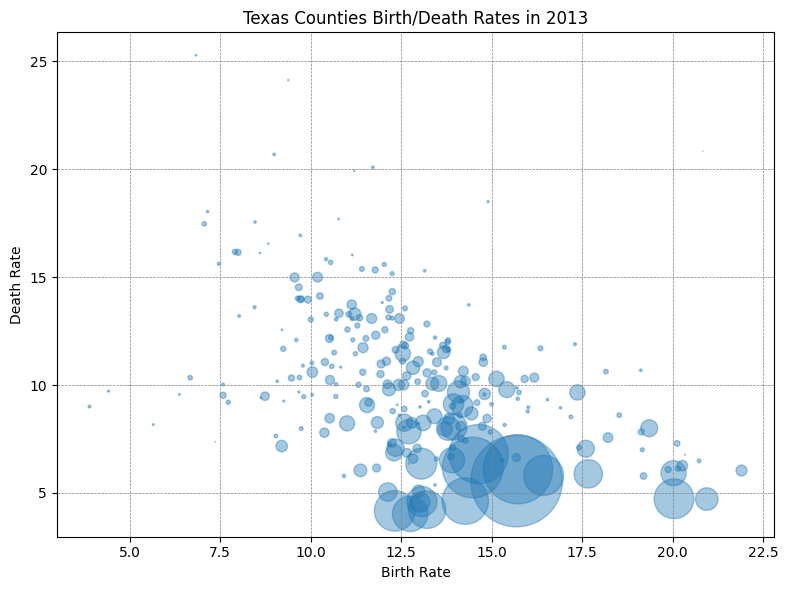

In [29]:
plt.figure(figsize=(8, 6))              # Set figure size
plt.rcParams.update({'font.size': 10})  # Update font size for axis labels, title, and ticks

dfTemp = dfTX             # Assign the DataFrame for easier manipulation

# Create a scatter plot for birth and death rates in 2013
plt.scatter(
    dfTemp.R_birth_2013,  # X-axis values: Birth Rate in 2013
    dfTemp.R_death_2013,  # Y-axis values: Death Rate in 2013
    alpha=0.4,            # Transparency of the points for better visualization
    s=dfTemp.POP_ESTIMATE_2013 / 1000,  # Marker size proportional to population size (scaled down for clarity)
)

plt.xlabel("Birth Rate")  # Set the label for the x-axis
plt.ylabel("Death Rate")  # Set the label for the y-axis
plt.title("Texas Counties Birth/Death Rates in 2013");  # Add a descriptive title

# Add grid lines to the plot
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")

plt.tight_layout()        # Adjust layout
plt.show()                # Display the plot

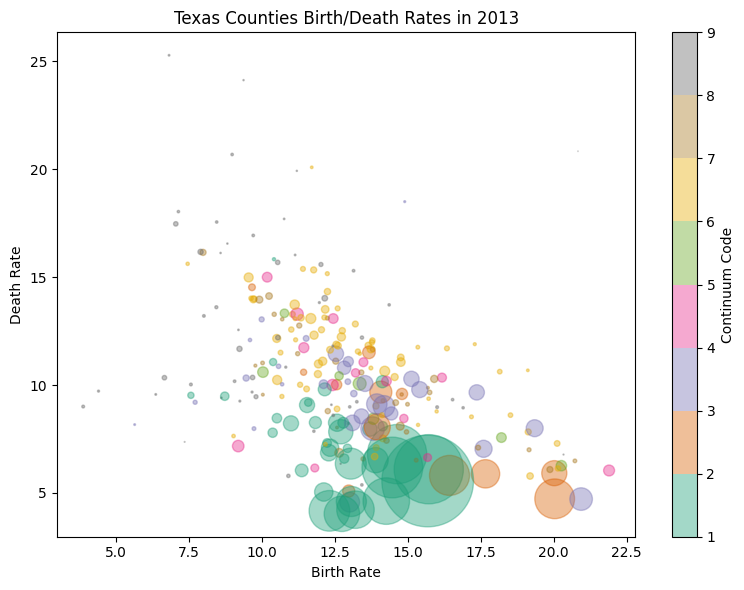

In [30]:
plt.figure(figsize=(8, 6))                      # Set the figure size

# Create a scatter plot for birth and death rates in 2013
plt.scatter(
    dfTX.R_birth_2013,                          # X-axis values: Birth Rate in 2013
    dfTX.R_death_2013,                          # Y-axis values: Death Rate in 2013
    alpha=0.4,                                  # Set transparency of points to 40%
    s=dfTX.POP_ESTIMATE_2013 / 1000,            # Marker size proportional to population size (scaled down for clarity)
    c=dfTX["Rural-urban_Continuum Code_2003"],  # Use rural-urban continuum code for color coding
    cmap='Dark2',                               # Use the 'Dark2' colormap
)

cbar = plt.colorbar()                                  # Add a color bar to the plot
cbar.ax.set_ylabel('Continuum Code', rotation=90)      # Label the color bar with "Continuum Code" rotated vertically

plt.xlabel("Birth Rate")                               # Set the label for the x-axis
plt.ylabel("Death Rate")                               # Set the label for the y-axis
plt.title("Texas Counties Birth/Death Rates in 2013")  # Add a descriptive title to the plot

plt.tight_layout()  # Adjust layout
plt.show()          # Display the plot

## Query-oriented Statistical Plotting

In [32]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


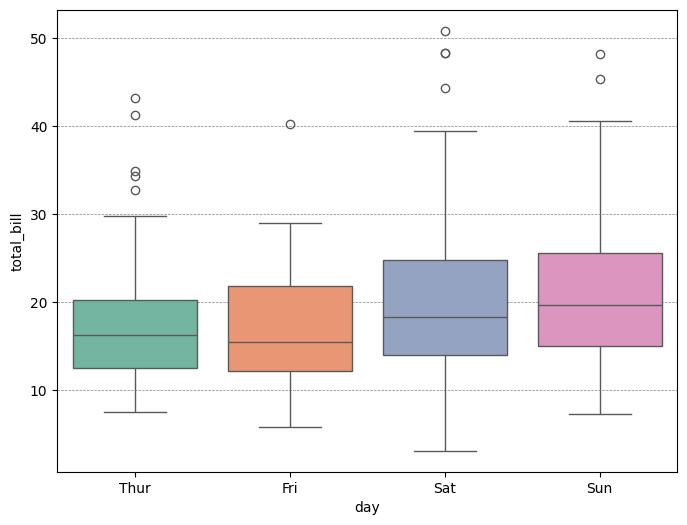

In [33]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Create a boxplot to visualize the distribution of total bills across days of the week
ax = sns.boxplot(
    x="day",         # Set the x-axis to the 'day' column, representing days of the week
    y="total_bill",  # Set the y-axis to the 'total_bill' column, representing the total bill amounts
    data=tips,       # Specify the dataset to use, which is the 'tips' DataFrame
    hue="day",       # Use the 'day' variable for coloring the boxplots
    palette="Set2"   # Specify a colorful palette
)

# Add horizontal grid lines for better readability
plt.grid(visible=True, axis="y", linestyle="--", linewidth=0.5, color="grey")  

plt.show()                         # Display the boxplot

## Example One: Prepare data to fit plotting function API

In [35]:
dfTX.head()

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
2568,48001,TX,Anderson County,5.0,7.0,8.0,8.0,4.0,58458,58459,...,11.471813,-1.616940,-0.855498,-4.722692,-0.810052,-0.051802,-2.839950,-0.729192,12.266547,-0.808470
2569,48003,TX,Andrews County,6.0,6.0,5.0,5.0,2.0,14786,14786,...,-20.882718,18.512822,26.126931,34.856036,27.658734,26.231998,23.474443,-26.025412,-19.189525,20.246651
2570,48005,TX,Angelina County,5.0,5.0,8.0,8.0,0.0,86771,86771,...,-4.194449,-10.057036,0.126292,-2.173727,-5.433135,-0.937507,-0.182364,-4.771313,-3.578959,-9.381990
2571,48007,TX,Aransas County,2.0,2.0,2.0,2.0,5.0,23158,23158,...,12.717722,-62.267715,5.388396,14.055838,22.641350,28.724721,14.781816,18.797744,12.836210,-62.145860
2572,48009,TX,Archer County,3.0,3.0,2.0,2.0,2.0,9054,9055,...,2.390983,-0.341452,-31.984843,-2.493907,-0.113611,6.578947,-11.253197,4.219409,2.504839,-0.227635


In [36]:
# Select the columns related to birth rates from the Texas DataFrame and make a copy
birthRatesDF = dfTX[birthRates].copy()

# Add an 'index' column to the DataFrame to retain the index values
birthRatesDF["index"] = birthRatesDF.index

# Convert the wide-format DataFrame into a long-format DataFrame
birthRatesDFLong = pd.melt(
    birthRatesDF,                         # Input DataFrame to reshape
    id_vars=["index"],                    # Columns to keep as identifiers (e.g., 'index')
    value_vars=birthRatesDF.columns[:-1]  # Columns to transform into rows (all except the last column, 'index')
)

# Extract the year from the 'variable' column and convert it to an integer
birthRatesDFLong["variable"] = birthRatesDFLong["variable"].apply(
    lambda x: int(x[-4:])                 # Take the last 4 characters of the column name and convert to an integer
)

birthRatesDFLong

,index,variable,value
0,2568,2011,10.146205
1,2569,2011,17.197473
2,2570,2011,14.259472
3,2571,2011,10.043969
4,2572,2011,7.243954
...,...,...,...
2027,2817,2018,9.170208
2028,2818,2018,17.489652
2029,2819,2018,11.936818
2030,2820,2018,17.068802


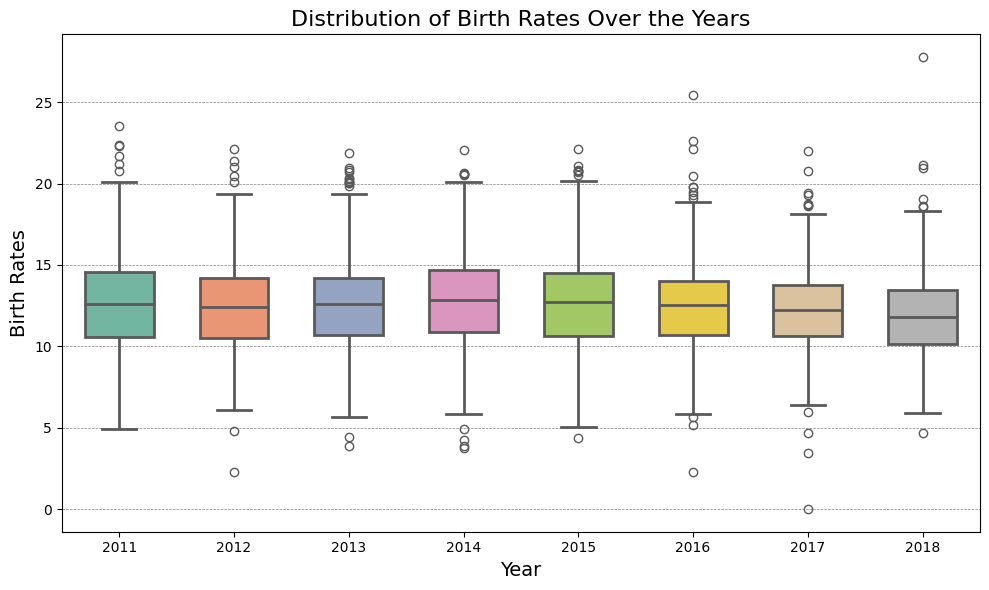

In [37]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a boxplot with the palette explicitly tied to the x variable as hue
sns.boxplot(
    x="variable",            # Assign the year as the x-axis
    y="value",               # Assign birth rates as the y-axis
    data=birthRatesDFLong,   # Use the reshaped long-format DataFrame
    hue="variable",          # Set 'variable' as the hue for coloring
    dodge=False,             # Disable dodging (offset) since hue matches x
    palette="Set2",          # Vibrant color palette
    width=0.6,               # Adjust box width
    linewidth=2,             # Set box border thickness
    legend=False             # Suppress the legend
)

# Set axis labels
plt.xlabel("Year", fontsize=14)
plt.ylabel("Birth Rates", fontsize=14)

# Add a title
plt.title("Distribution of Birth Rates Over the Years", fontsize=16)

# Add horizontal grid lines for better visual reference
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey", axis="y")

plt.tight_layout()  # Ensure layout elements do not overlap
plt.show()          # Display the boxplot

## Example Two: Combine analysis with plain plotting

In [39]:
dfTX.head()

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
2568,48001,TX,Anderson County,5.0,7.0,8.0,8.0,4.0,58458,58459,...,11.471813,-1.616940,-0.855498,-4.722692,-0.810052,-0.051802,-2.839950,-0.729192,12.266547,-0.808470
2569,48003,TX,Andrews County,6.0,6.0,5.0,5.0,2.0,14786,14786,...,-20.882718,18.512822,26.126931,34.856036,27.658734,26.231998,23.474443,-26.025412,-19.189525,20.246651
2570,48005,TX,Angelina County,5.0,5.0,8.0,8.0,0.0,86771,86771,...,-4.194449,-10.057036,0.126292,-2.173727,-5.433135,-0.937507,-0.182364,-4.771313,-3.578959,-9.381990
2571,48007,TX,Aransas County,2.0,2.0,2.0,2.0,5.0,23158,23158,...,12.717722,-62.267715,5.388396,14.055838,22.641350,28.724721,14.781816,18.797744,12.836210,-62.145860
2572,48009,TX,Archer County,3.0,3.0,2.0,2.0,2.0,9054,9055,...,2.390983,-0.341452,-31.984843,-2.493907,-0.113611,6.578947,-11.253197,4.219409,2.504839,-0.227635


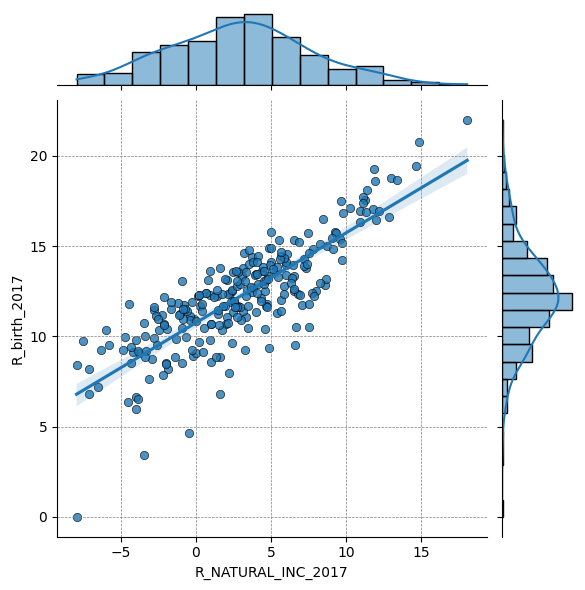

In [40]:
# Create a jointplot to visualize the relationship between natural increase rate and birth rate in 2017
jointplot = sns.jointplot(
    x="R_NATURAL_INC_2017",       # Set the x-axis variable to 'R_NATURAL_INC_2017' (natural increase rate)
    y="R_birth_2017",             # Set the y-axis variable to 'R_birth_2017' (birth rate)
    data=dfTX,                    # Use the 'dfTX' DataFrame as the data source
    kind="reg",                   # Specify the plot type as regression, showing a scatterplot with a regression line
    height=6,                     # Set the size of the jointplot to 8 inches
    scatter_kws={"edgecolor": "black", "linewidths": 0.5}  # Add black borders to the scatter points
)

# Add a grid to both axes for better readability
jointplot.ax_joint.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")

# Show the plot
plt.show()                        # Display the jointplot